## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Import Data

In [2]:
# Read the csv file
df1 = pd.read_csv("realtor-data.csv")

## View Data

In [3]:
df1.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


In [5]:
# To check the size of the csv file.
df1.shape

(923159, 12)

**Comment:** So, there are 923159 rows and 12 columns. Let's check for any duplicate items.

In [6]:
df1.duplicated().sum()

809370

**Comment:** WOW!!! There are 809370 duplicated rows. Let's fix it by deleting all those duplicated rows.

In [7]:
df2 = df1.drop_duplicates()

In [8]:
df2.shape

(113789, 12)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113789 entries, 0 to 923147
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        113789 non-null  object 
 1   price         113771 non-null  float64
 2   bed           96273 non-null   float64
 3   bath          97492 non-null   float64
 4   acre_lot      82666 non-null   float64
 5   full_address  113789 non-null  object 
 6   street        113278 non-null  object 
 7   city          113766 non-null  object 
 8   state         113789 non-null  object 
 9   zip_code      113756 non-null  float64
 10  house_size    77341 non-null   float64
 11  sold_date     59697 non-null   object 
dtypes: float64(6), object(6)
memory usage: 11.3+ MB


**Comment:** Zip code is float64. Seems wrong. Let's fix this.

In [10]:
df2['zip_code'] = df2['zip_code'].apply(lambda x: '{:05}'.format(int(x))if x == x else x).fillna('00000')
df2.head()

/tmp/ipykernel_100816/2807170144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zip_code'] = df2['zip_code'].apply(lambda x: '{:05}'.format(int(x))if x == x else x).fillna('00000')


,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,00601,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,00601,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,00795,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,00731,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,00680,NaN,NaN


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113789 entries, 0 to 923147
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        113789 non-null  object 
 1   price         113771 non-null  float64
 2   bed           96273 non-null   float64
 3   bath          97492 non-null   float64
 4   acre_lot      82666 non-null   float64
 5   full_address  113789 non-null  object 
 6   street        113278 non-null  object 
 7   city          113766 non-null  object 
 8   state         113789 non-null  object 
 9   zip_code      113789 non-null  object 
 10  house_size    77341 non-null   float64
 11  sold_date     59697 non-null   object 
dtypes: float64(5), object(7)
memory usage: 11.3+ MB


In [12]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
status,113789,2,for_sale,113512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,113771.0,NaN,NaN,NaN,909606.368459,3418917.949662,0.0,250000.0,449900.0,800000.0,875000000.0
bed,96273.0,NaN,NaN,NaN,3.308789,1.858004,1.0,2.0,3.0,4.0,123.0
bath,97492.0,NaN,NaN,NaN,2.521181,1.730873,1.0,2.0,2.0,3.0,198.0
acre_lot,82666.0,NaN,NaN,NaN,17.739735,981.810193,0.0,0.11,0.26,1.03,100000.0
full_address,113789,112232,"101 Parkview Way, Newtown Square, PA, 19073",34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,113278,110324,101 Parkview Way,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,113766,2542,New York City,6649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,113789,18,New Jersey,32759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,113789,3192,10023,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Comment:** Looking at the 75% values it seems there are some outliers for price, bed, bath, acre_lot, house_size. Let's tackle the problem.

In [13]:
df2[df2["price"] > 800000000]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
572886,for_sale,875000000.0,9.0,2.0,NaN,"952 E 223 St Units 4858 & 66, Bronx, NY, 10458",952 E 223 St Units 4858 & 66,Bronx,New York,10458,2440.0,2002-12-30


**Comment:** The house price 875000000 seems very unreasonable. Let's delete this row.

In [14]:
df2 = df2.drop(572886)

In [15]:
df2.shape

(113788, 12)

In [16]:
df2[df2["bed"] > 100]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
536923,for_sale,120000000.0,123.0,123.0,NaN,"421 W 250th St, New York City, NY, 10471",421 W 250th St,New York City,New York,10471,NaN,2012-06-29


**Comment:** 123 bed seems unreasonable and let's delete this row.

In [17]:
df2 = df2.drop(536923)

In [18]:
df2.shape

(113787, 12)

In [19]:
df2[df2["bath"] > 100]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
121247,for_sale,5300000.0,99.0,198.0,0.29,"6 Jefferson St Apt 12, Winthrop, MA, 02152",6 Jefferson St Apt 12,Winthrop,Massachusetts,02152,14462.0,NaN


In [20]:
df2 = df2.drop(121247)

In [21]:
df2.shape

(113786, 12)

In [22]:
df2[df2["house_size"] > 1000000]

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
10328,for_sale,8250000.0,5.0,6.0,33.29,"PR-250 Int, Culebra, PR, 00775",PR-250 Int,Culebra,Puerto Rico,00775,1450112.0,NaN


In [23]:
df2 = df2.drop(10328)

In [24]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
status,113785,2,for_sale,113508,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,113767.0,NaN,NaN,NaN,900773.301098,2201860.115582,0.0,250000.0,449900.0,800000.0,169000000.0
bed,96269.0,NaN,NaN,NaN,3.306475,1.791095,1.0,2.0,3.0,4.0,86.0
bath,97488.0,NaN,NaN,NaN,2.51791,1.566858,1.0,2.0,2.0,3.0,56.0
acre_lot,82664.0,NaN,NaN,NaN,17.739758,981.822067,0.0,0.11,0.26,1.03,100000.0
full_address,113785,112228,"101 Parkview Way, Newtown Square, PA, 19073",34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street,113274,110320,101 Parkview Way,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,113762,2542,New York City,6648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,113785,18,New Jersey,32759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,113785,3192,10023,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
missing = pd.concat([df2.isnull().sum(), 100 * df2.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count'])

,count,%
status,0,0.000000
full_address,0,0.000000
state,0,0.000000
zip_code,0,0.000000
price,18,0.015819
city,23,0.020214
street,511,0.449093
bath,16297,14.322626
bed,17516,15.393945
acre_lot,31121,27.350705


In [26]:
dict = {}
for i in list(df2.columns):
    dict[i] = df2[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
status,2
price,7208
bed,41
bath,37
acre_lot,3281
full_address,112228
street,110320
city,2542
state,18
zip_code,3192


### Filling the missing values with Mean/Median/Mode

In [27]:
df2["price"].fillna(df2["price"].median(), inplace=True)
df2["bed"].fillna(df2["bed"].median(), inplace=True)
df2["bath"].fillna(df2["bath"].median(), inplace=True)
df2["acre_lot"].fillna(df2["acre_lot"].median(), inplace=True)
df2["house_size"].fillna(df2["house_size"].median(), inplace=True)

df2["city"].fillna(df2["city"].mode()[0], inplace=True)
df2["street"].fillna(df2["street"].mode()[0], inplace=True)

In [28]:
df2.isnull().sum()

status              0
price               0
bed                 0
bath                0
acre_lot            0
full_address        0
street              0
city                0
state               0
zip_code            0
house_size          0
sold_date       54090
dtype: int64

**Comment:** For now let's drop the sold_date column.

In [29]:
df = df2.drop("sold_date", axis=1)

In [30]:
df.isnull().sum()

status          0
price           0
bed             0
bath            0
acre_lot        0
full_address    0
street          0
city            0
state           0
zip_code        0
house_size      0
dtype: int64

In [31]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
status,2
price,7208
bed,41
bath,37
acre_lot,3281
full_address,112228
street,110320
city,2542
state,18
zip_code,3192


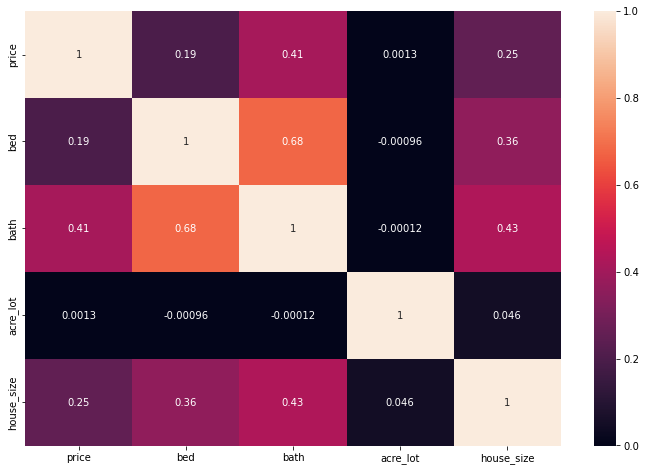

In [32]:
plt.figure(figsize=(12,8))
_ = sns.heatmap(df.corr(), annot=True)

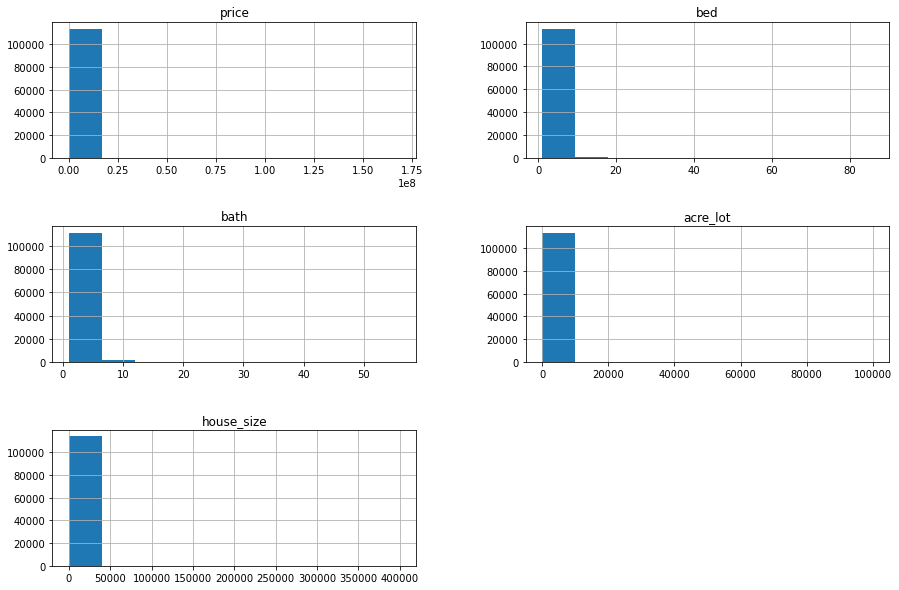

In [33]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [34]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 2.5 * IQR)) |(df[col] > (Q3 + 2.5 * IQR)))]

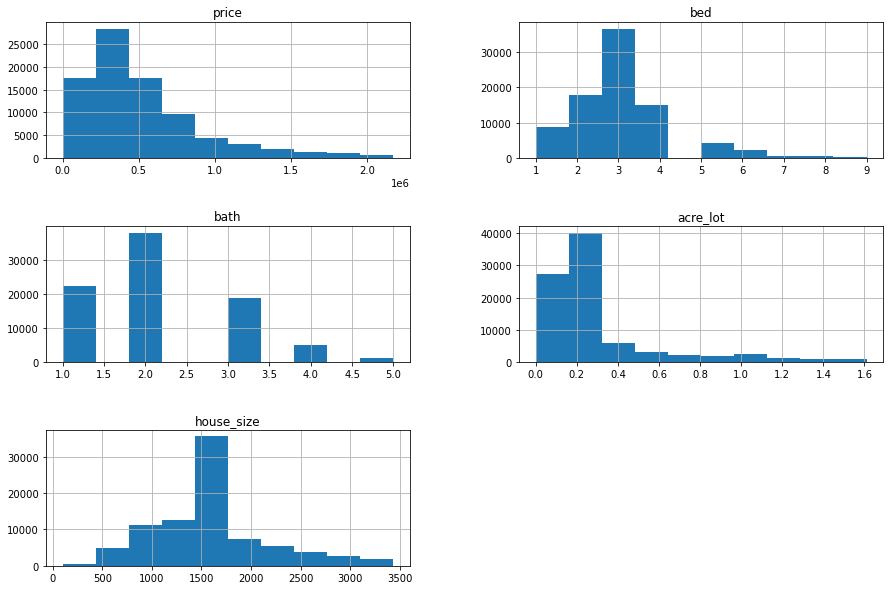

In [35]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

### Data is ready for the next step